# Plot Temperature Live
This example uses a command line program to plot the temperature of the Xilinx Zynq chip.

The simplest way to get the internal Red Pitaya temperature is to use `xadc_get_value_temp` as described in the forum post below
https://forum.redpitaya.com/viewtopic.php?t=1078 

This command can be run repeatedly to create a graph

Get the current temperature, this is returned as a string 

In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
from datetime import datetime, date
import time
import pandas as pd

headers = ["Temperature (oC)","Time(Minutes)"]

<IPython.core.display.Javascript object>


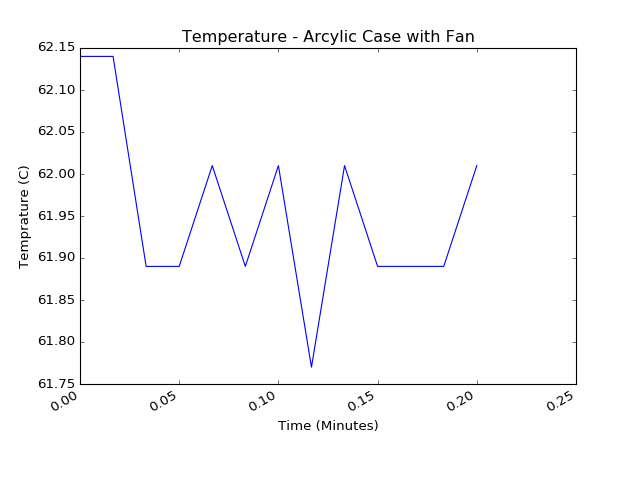

In [9]:
df = pd.DataFrame() #Create an empty data frame to append to later

def animate(i):
    global df
    global plt
    clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
    current_temp = !xadc_get_value_temp
    temp_value = float(current_temp[0][:5])
    clean_data_table['Temperature (oC)'] = [temp_value]
    clean_data_table['Time(Minutes)'] = [i/60]
    df = df.append(clean_data_table)
    
    x = df['Time(Minutes)']
    y1 = df['Temperature (oC)']
    plt.cla()
    plt.plot(x,y1)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Time (Minutes)')
    plt.ylabel('Temprature (C)')
    plt.title("Temperature - Arcylic Case with Fan")
#    plt.ylim(ymin=0,ymax=85)
#    plt.xlim(xmin=0,xmax=10.0)

ani = FuncAnimation(plt.gcf(), animate,interval=1000)
plt.show()

In [4]:
filename = str(date.today()) + " temperature data.csv"
try:
    df[headers] #Make sure the DataFrame is in the correct order
    df.to_csv(filename,names=headers)
except:
    df = pd.DataFrame() #Create an empty data frame to append to later
df

""


In [5]:
current_temp = !xadc_get_value_temp
temp_value = float(current_temp[0][:5])
temp_value

61.4